[BACK](https://www.slopezza.com/playground)
<br> <br>
[GitHub repository](https://github.com/smlopezza/CustomerSegmentation)
<br>
[Kaggle](https://www.kaggle.com/smlopezza/customer-segmentation-credit-card-transactions)

# Customer Segmentation from Credit Card Transactions

*Customer segmentation* divides costumers into groups based on common characteristics. This is useful for companies to be able to strategize their marketing estrategies in a more effective way. One of the main goals is to identify ways to improve products or new product or service opportunities.

[Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means) is an *Unsupervised Learning* methodology, useful to develop customer segmentation analysis. One of the most known algorithms is KMeans. KMeans requires the number of clusters to be specified and clusters data by trying to separate samples in n groups of equal variance, minimizing inertia. KMeans scales well to large number of samples.


## Objective
In this playground project, a customer segmentation using KMeans is developed. The dataset sumarizes the behaviour of 8950 clients and includes information such as balance, purchases, cash advance, among others.

In this notebook I am practicing my skills in:
* __Pandas__ to handling the data
* __Clustering__ (KMeans --> Sklearn)



## Resources
* The data for this notebook can be found at [Kaggle (data source)](https://www.kaggle.com/arjunbhasin2013/ccdata) <br>
* A tutorial from [Ryan Ahmed](https://www.coursera.org/instructor/~48777395) using this dataset can be found as a [Coursera Guided Project](https://www.coursera.org/projects/machine-learning-for-customer-segmentation)


## Graphical Summary of Results
* 7 Clusters were used for customer segmentation
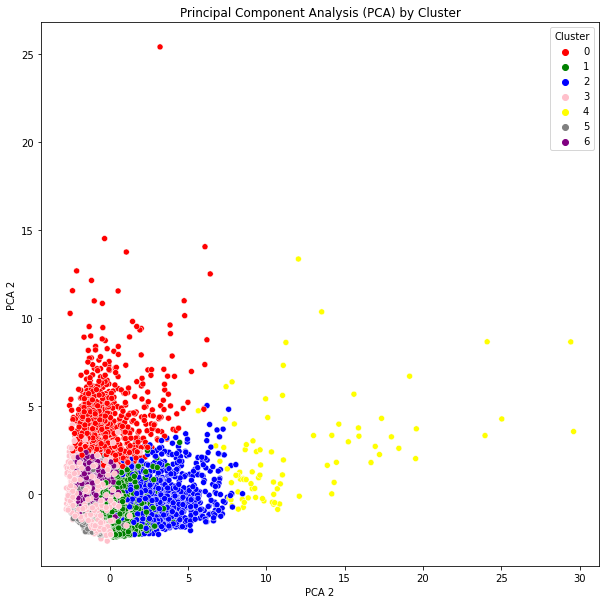



## Contents
0. <a href='#eda'> Exploratory Data Analysis (EDA) </a>
1. <a href='#clustering'> Clustering: K-Means </a>
2. <a href='#pca'> Principal Component Analysis (PCA) </a>
3. <a href='#conclusions'> Conclusions </a>


## Initial Setup
* Import the packages needed for the notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load Data

In [ ]:
creditcard = pd.read_csv('../input/ccdata/CC GENERAL.csv')
creditcard.head()

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

To better understand the data it is important to explore the dataset. First a statistical description of the dataset is obtained. Then null values are replaced with the mean of the column. Next, histograms and correlation plots are done.

* __Describe -__ Main statistical information is obtained: minimum, maximum values as well as standard deviations and quarters.



In [ ]:
creditcard.describe()

* Checking for __null values__ --> MINIMUM_PAYMENTS and CREDIT_LIMIT COLUMNS present null values

In [ ]:
creditcard.isnull().sum()

* There are different options to work with null values. One would be to drop them, but in this case I am filling them with the mean value of the column

In [ ]:
creditcard['CREDIT_LIMIT'].fillna(creditcard['CREDIT_LIMIT'].mean(), inplace=True)
creditcard['MINIMUM_PAYMENTS'].fillna(creditcard['MINIMUM_PAYMENTS'].mean(), inplace=True)

creditcard.isnull().sum()

* Check for **duplicates**

In [ ]:
duplicatesN = creditcard[creditcard.duplicated()]['CUST_ID'].count()
print(f"Number of dupplicated entries: {duplicatesN}")

* **Histogram Plots** - help to understand how the values on the different parameters are distributed

In [ ]:
columnsName = creditcard.columns[1:]  # CUST_ID column is not considered
plt.figure(figsize=(12,55))
for ii, columnName in enumerate(columnsName): 
    plt.subplot(len(columnsName), 1, ii+1)
    plt.hist(creditcard[columnName], alpha=.4, bins=30)
    plt.title(columnName)
    
plt.tight_layout()

* **Correlation matrix** - helps visualizing how the different variables are correlated. 

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(creditcard.corr(), annot=True)

In [ ]:
# As customer ID is not important for this analysis, I will drop this from the dataframe
creditcard_df = creditcard.copy()
creditcard_df = creditcard_df.drop(columns='CUST_ID')

<a id='clustering'></a>
## Clustering: k-Means

[KMeans clustering](https://en.wikipedia.org/wiki/K-means_clustering) was originated for signal processing. It splits the data into *k* clusters in which each observation belongs to the cluster with the nearest mean. More information about K-Means [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).


### Scale/standardize
The first step to apply k-Means is to scale/standarize the features. It is not convinient to have features at different scale. Here I am using a standar scaler.


In [ ]:
scaler = StandardScaler()
creditcard_scaled = scaler.fit_transform(creditcard_df)

### Elbow method
To decide how many clusters are needed, [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.) can be used. The idea is to find the proper number of clusters accounting for both, inertia and computer time. Here we selected 7 as the optimum value.

In [ ]:
inertiaValue = []

for ii in range(1, 25):
    model = KMeans( n_clusters = ii )
    model.fit(creditcard_scaled)
    inertiaValue.append(model.inertia_)
    
plt.plot(inertiaValue,'bs-')

### Applying k-Means

In [ ]:
kmeans = KMeans(7)
kmeans.fit(creditcard_scaled)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_scaled)

In [ ]:
# New column including the cluster for each sample
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

### Visualization

All the varialbes are plote according to the cluster assigned by k-Means. However, it is not possible to visualize all the 17 features. In this case a Principal Component Analysis is needed.

In [ ]:
columnsName = creditcard_df_cluster.columns
for ii, columnName in enumerate(columnsName): 
    plt.figure(figsize=(35,5))
    
    for jj in range(7):
        plt.subplot(1, 7, jj+1)    
        plot_df = creditcard_df_cluster[creditcard_df_cluster['cluster'] == jj]    
        plt.hist(plot_df[columnName], alpha=.4, bins=30)
        plt.title('{}    \nCluster {} '.format(columnName, jj))
    
plt.tight_layout()

<a id='pca'></a>
## Principal Component Analysis (PCA)

[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) is a dimensional reduction technique. The idea is to be able to visualize the different clusters by reducing to 2 dimensions.

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_scaled)

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['PCA 1','PCA 2'])
pca_df['Cluster'] = labels  
pca_df.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PCA 1", y="PCA 2", hue = "Cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.title('Principal Component Analysis (PCA) by Cluster')

<a id='conclusions'></a>
## Conclusions
* It was possible to use k-Means to perform customer segmentation of 8950 credit card users.
* 7 Clusters can explain the customers behaviors
* PCA can be used to visualize the clustering